By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/07/19

Videos:
* [[10分鐘搞懂機器學習] 3.7 嶺迴歸 Ridge regression](https://youtu.be/CgX8ZZQhFis?si=kc0tb6jsVdGdNtV0)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


嶺迴歸 Ridge Regression

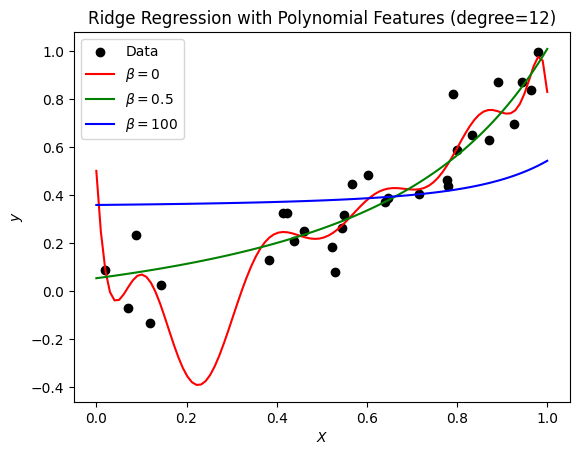

In [ ]:
# Code was generated by ChatGPT and then modified by Yulandy Chiu
# Prompt: Python code: 使用quadratic function產生data，使用Ridge Regression(degree=12)的多項式擬合數據，繪圖比較正規化超參數beta=0, beta=0.5, beta=100的模型

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# 生成二次函數數據
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = X**2 + np.random.normal(0, 0.1, n_samples)

# 繪制真實數據
plt.scatter(X, y, color='black', label='Data')

# 多項式擬合和繪圖
degree = 12
X_plot = np.linspace(0, 1, 100)

betas = [0, 0.5, 100]
colors = ['red', 'green', 'blue']
labels = [f'$\\beta={beta}$' for beta in betas]

for beta, color, label in zip(betas, colors, labels):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=beta))
    model.fit(X[:, np.newaxis], y)
    y_plot = model.predict(X_plot[:, np.newaxis])
    plt.plot(X_plot, y_plot, color=color, label=label)

plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.title('Ridge Regression with Polynomial Features (degree=12)')
plt.show()


最小絕對緊縮與選擇算子迴歸
Least Absolute Shrinkage and Selection Operator (Lasso) Regression

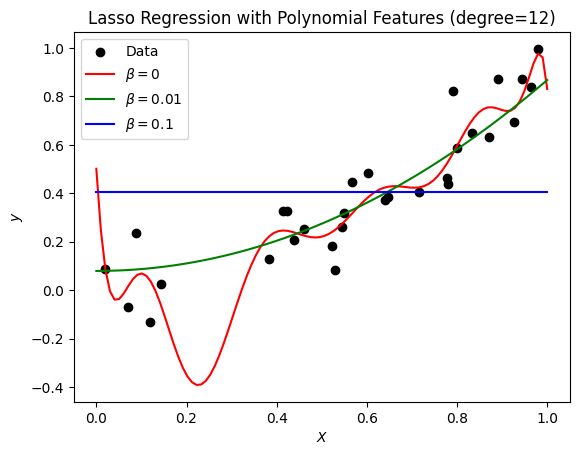

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# 生成二次函數數據
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = X**2 + np.random.normal(0, 0.1, n_samples)

# 繪制真實數據
plt.scatter(X, y, color='black', label='Data')

# 多項式擬合和繪圖
degree = 12
X_plot = np.linspace(0, 1, 100)

betas = [0, 0.01, 0.1]
colors = ['red', 'green', 'blue']
labels = [f'$\\beta={beta}$' for beta in betas]

for beta, color, label in zip(betas, colors, labels):
    # scikit-learn的 Lasso迴歸是專門用來處理beta >0的；
    # 如果beta非常接近 0，會造成演算法數值解不穩定，
    # 須手動改成linear/polynomial regression
    if 0 <= beta <= 1e-3:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    else:
        model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=beta, max_iter=10000))
    model.fit(X[:, np.newaxis], y)
    y_plot = model.predict(X_plot[:, np.newaxis])
    plt.plot(X_plot, y_plot, color=color, label=label)

plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.title('Lasso Regression with Polynomial Features (degree=12)')
plt.show()





彈性網路 Elastic Net

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.578e-01, tolerance: 2.512e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


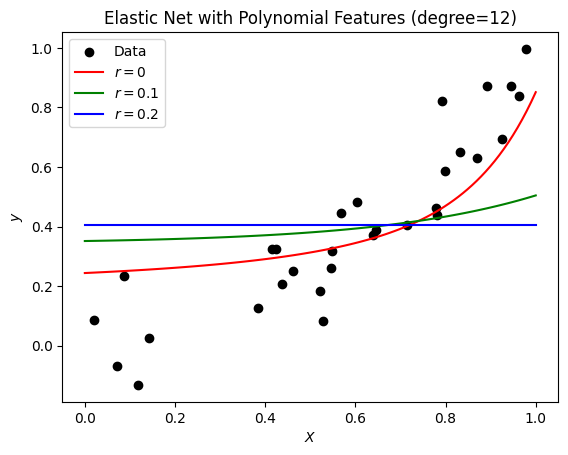

In [ ]:
# Code was modified from Ridge Regression by Yulandy Chiu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# 生成二次函數數據
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = X**2 + np.random.normal(0, 0.1, n_samples)

# 繪制真實數據
plt.scatter(X, y, color='black', label='Data')

# 多項式擬合和繪圖
degree = 12
X_plot = np.linspace(0, 1, 100)

r_values = [0, 0.1, 0.2]
colors = ['red', 'green', 'blue']
labels = [f'$r={r}$' for r in r_values]

for r, color, label in zip(r_values, colors, labels):
    model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=0.5, l1_ratio=r, max_iter=100))
    model.fit(X[:, np.newaxis], y)
    y_plot = model.predict(X_plot[:, np.newaxis])
    plt.plot(X_plot, y_plot, color=color, label=label)


plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.title('Elastic Net with Polynomial Features (degree=12)')
plt.show()


